In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
! pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

In [8]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57          14969        470  1.0              
joebeachcapital/students-performance                       Students Performance                             2KB  2023-08-31 00:50:11           5244        136  1.0              
atharvbharaskar/students-test-data                         Students Test Data                               4KB  2023-09-12 10:07:18            952         22  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target  Zzzs: Lightweight training dataset + target    185M

In [12]:
!kaggle competitions download -c plant-seedlings-classification

 99% 1.67G/1.69G [00:12<00:00, 195MB/s]
100% 1.69G/1.69G [00:12<00:00, 141MB/s]


In [13]:
! mkdir train

In [14]:
! unzip /content/plant-seedlings-classification.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/test/ad12382d4.png  
  inflating: train/test/adb7a032c.png  
  inflating: train/test/ae90f2827.png  
  inflating: train/test/aecfaed64.png  
  inflating: train/test/aee6fa3df.png  
  inflating: train/test/af45e222a.png  
  inflating: train/test/afa446484.png  
  inflating: train/test/afcf6abd5.png  
  inflating: train/test/b026bf8ca.png  
  inflating: train/test/b03397525.png  
  inflating: train/test/b0acaff4a.png  
  inflating: train/test/b130a0632.png  
  inflating: train/test/b145ba9d4.png  
  inflating: train/test/b1cd2a91e.png  
  inflating: train/test/b215531dd.png  
  inflating: train/test/b2706e2b3.png  
  inflating: train/test/b29339405.png  
  inflating: train/test/b30ab4659.png  
  inflating: train/test/b31292706.png  
  inflating: train/test/b341d0aab.png  
  inflating: train/test/b39c71707.png  
  inflating: train/test/b3d6fdb80.png  
  inflating: train/test/b3e08b037.png  
  inflating: train/test/b4769

In [15]:
data_dir = '/content/train/train'
batch_size = 32
image_size = (128, 128)  # Adjust the size as needed

In [16]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
)

In [17]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 3803 images belonging to 12 classes.


In [18]:

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 947 images belonging to 12 classes.


In [19]:
def build_lenet5_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define the AlexNet architecture
def build_alexnet_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(256, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define the VGG architecture (VGG16)
def build_vgg_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


In [24]:
# Define the input shape and number of classes
input_shape = (image_size[0], image_size[1], 3)
num_classes = 12  # Number of plant species in the dataset

In [25]:
lenet5_model = build_lenet5_model(input_shape, num_classes)
vgg_model = build_vgg_model(input_shape, num_classes)

In [27]:
lenet5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
lenet5_history = lenet5_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50
119/119 [==============================] - 60s 405ms/step - loss: 1.9704 - accuracy: 0.3200 - val_loss: 1.5268 - val_accuracy: 0.4910
Epoch 2/50
119/119 [==============================] - 49s 410ms/step - loss: 1.3165 - accuracy: 0.5401 - val_loss: 1.2199 - val_accuracy: 0.5744
Epoch 3/50
119/119 [==============================] - 48s 404ms/step - loss: 1.0285 - accuracy: 0.6563 - val_loss: 1.0273 - val_accuracy: 0.6473
Epoch 4/50
119/119 [==============================] - 48s 408ms/step - loss: 0.8490 - accuracy: 0.7155 - val_loss: 1.1848 - val_accuracy: 0.6114
Epoch 5/50
119/119 [==============================] - 48s 406ms/step - loss: 0.7034 - accuracy: 0.7562 - val_loss: 0.9504 - val_accuracy: 0.7033
Epoch 6/50
119/119 [==============================] - 49s 408ms/step - loss: 0.5756 - accuracy: 0.8086 - val_loss: 0.9059 - val_accuracy: 0.7096
Epoch 7/50
119/119 [==============================] - 49s 413ms/step - loss: 0.4778 - accuracy: 0.8372 - val_loss: 0.9085 - val_ac

In [29]:
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

lenet5_test_loss, lenet5_test_acc = lenet5_model.evaluate(test_generator)
print(f'LeNet-5 Test Accuracy: {lenet5_test_acc}')


Found 947 images belonging to 12 classes.
30/30 [==============================] - 10s 334ms/step - loss: 2.6102 - accuracy: 0.7117
LeNet-5 Test Accuracy: 0.7117212414741516


In [30]:
lenet5_test_loss, lenet5_test_acc = lenet5_model.evaluate(test_generator)
print(f'LeNet-5 Test Accuracy: {lenet5_test_acc}')


30/30 [==============================] - 9s 302ms/step - loss: 2.6102 - accuracy: 0.7117
LeNet-5 Test Accuracy: 0.7117212414741516


In [31]:
vgg_history = vgg_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50
119/119 [==============================] - 59s 468ms/step - loss: 2.0962 - accuracy: 0.3048 - val_loss: 1.6179 - val_accuracy: 0.4213
Epoch 2/50
119/119 [==============================] - 53s 446ms/step - loss: 1.2792 - accuracy: 0.5433 - val_loss: 1.0689 - val_accuracy: 0.6399
Epoch 3/50
119/119 [==============================] - 51s 431ms/step - loss: 0.8974 - accuracy: 0.6824 - val_loss: 0.8587 - val_accuracy: 0.7128
Epoch 4/50
119/119 [==============================] - 51s 426ms/step - loss: 0.6077 - accuracy: 0.7849 - val_loss: 0.7704 - val_accuracy: 0.7497
Epoch 5/50
119/119 [==============================] - 51s 429ms/step - loss: 0.4135 - accuracy: 0.8485 - val_loss: 0.8177 - val_accuracy: 0.7402
Epoch 6/50
119/119 [==============================] - 50s 425ms/step - loss: 0.2795 - accuracy: 0.8935 - val_loss: 0.9055 - val_accuracy: 0.7761
Epoch 7/50
119/119 [==============================] - 52s 430ms/step - loss: 0.2255 - accuracy: 0.9177 - val_loss: 0.8062 - val_ac

In [32]:
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_generator)


30/30 [==============================] - 10s 319ms/step - loss: 2.4207 - accuracy: 0.8110


In [33]:
print(f'VGG Test Accuracy: {vgg_test_acc}')


VGG Test Accuracy: 0.8109820485115051


1/1 [==============================] - 0s 18ms/step


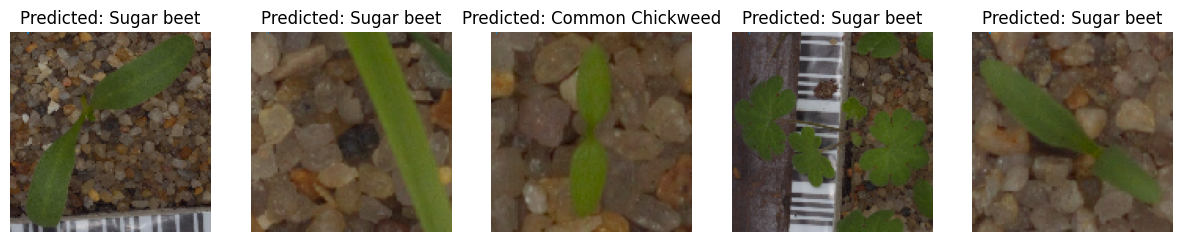

In [36]:
# Get a batch of validation images and labels for VGG
sample_images_vgg, sample_labels_vgg = next(val_generator)

# Convert class_indices.keys() to a list to access elements by index
class_names_vgg = list(train_generator.class_indices.keys())

plt.figure(figsize=(15, 5))

num_samples = 5  # Adjust the number of samples to display
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images_vgg[i])
    plt.title(f'Actual: {class_names_vgg[np.argmax(sample_labels_vgg[i])]}')
    plt.axis('off')

    predictions_vgg = vgg_model.predict(np.expand_dims(sample_images_vgg[i], axis=0))  # Make a prediction for each sample individually
    plt.bar(range(num_classes), predictions_vgg[0])
    plt.xticks(range(num_classes), class_names_vgg, rotation=90)
    plt.title(f'Predicted: {class_names_vgg[np.argmax(predictions_vgg)]}')

plt.show()

